<span style="color:#011f4b; font-size:15px; ">
 <h3>TASK 1 [5 min]</h3> <br/>Import all necessary <code>packages</code> and get first look at you <code>dataset</code> 
    <br/> <span style="color:#00a0e5">(Ваша задача - подключить все необходимые пакеты и получить представление о данных) </span>
    </span>

In [144]:
import pandas as pd
import numpy as np 
%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sns

In [145]:
from sklearn.linear_model import LinearRegression, LassoCV, RidgeCV
from sklearn.model_selection import train_test_split, GridSearchCV, cross_val_score, KFold
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error
from sklearn.preprocessing import PolynomialFeatures, StandardScaler, LabelEncoder, OneHotEncoder
from sklearn.feature_selection import ( VarianceThreshold, RFECV, mutual_info_regression, 
                                       f_regression, SelectKBest )

In [146]:
df = pd.read_csv('data/london_bike (1).csv', index_col=['Unnamed: 0'])
init_size = df.shape

In [147]:
df.head()

,timestamp,cnt,t1,t2,hum,wind_speed,weather_code,is_holiday,is_weekend,season
0,2015-01-04 00:00:00,182,3.0,2.0,93.0,6.0,3.0,0.0,NaN,3.0
1,2015-01-04 01:00:00,138,3.0,2.5,93.0,NaN,1.0,0.0,1.0,3.0
2,2015-01-04 02:00:00,134,2.5,NaN,96.5,0.0,1.0,0.0,1.0,3.0
3,2015-01-04 03:00:00,72,2.0,2.0,100.0,0.0,1.0,0.0,NaN,3.0
4,2015-01-04 04:00:00,47,2.0,0.0,93.0,6.5,NaN,0.0,1.0,3.0


In [148]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 17414 entries, 0 to 17413
Data columns (total 10 columns):
timestamp       17414 non-null object
cnt             17414 non-null int64
t1              17109 non-null float64
t2              17090 non-null float64
hum             17099 non-null float64
wind_speed      17042 non-null float64
weather_code    17088 non-null float64
is_holiday      17079 non-null float64
is_weekend      17076 non-null float64
season          17098 non-null float64
dtypes: float64(8), int64(1), object(1)
memory usage: 1.5+ MB


Metadata:
- "timestamp" - timestamp field for grouping the data
- "cnt" - the count of a new bike shares
- "t1" - real temperature in C
- "t2" - temperature in C "feels like"
- "hum" - humidity in percentage
- "wind_speed" - wind speed in km/h
- "weather_code" - category of the weather
- "is_holiday" - boolean field - 1 holiday / 0 non holiday
- "is_weekend" - boolean field - 1 if the day is weekend
- "season" - category field meteorological seasons: 0-spring ; 1-summer; 2-fall; 3-winter.
- "weather_code" category description:
<br><br>
- 1 = Clear ; mostly clear but have some values with haze/fog/patches of fog/ fog in vicinity
- 2 = scattered clouds / few clouds
- 3 = Broken clouds
- 4 = Cloudy
- 7 = Rain/ light Rain shower/ Light rain
- 10 = rain with thunderstorm
- 26 = snowfall
- 94 = Freezing Fog

In [149]:
for i in df.columns:
    if(df[i].isna().mean()!=0):
        print(i)
        print(df[i].isna().mean())

t1
0.01751464339037556
t2
0.018605719536005514
hum
0.018088893993338694
wind_speed
0.02136212243022855
weather_code
0.01872056965659814
is_holiday
0.01923739519926496
is_weekend
0.0194096703801539
season
0.018146319053635007


In [150]:
numerical = df.drop('cnt',axis=1).select_dtypes(include=['float64', 'int64']).columns
numerical

Index(['t1', 't2', 'hum', 'wind_speed', 'weather_code', 'is_holiday',
       'is_weekend', 'season'],
      dtype='object')

<span style="color:#011f4b; font-size:15px; ">
 <h3>TASK 2 [20 min]</h3> <br/>Data editing -  <code>clean</code>, <code>change the formats</code>, <code>drop outliers</code> and <code>drop or restore NANs</code> in your dataset
    <br/> <span style="color:#00a0e5">(Очистите бесполезные данные, обработайте аутлайеры, приведите в нужный формат и удалите или восстановите NaN NANы) </span>
    </span>

In [151]:
df = df.dropna()

In [152]:
for i in numerical:
    df.drop(df[df[i] < df[i].quantile(.01)].index, inplace=True)
    df.drop(df[df[i] > df[i].quantile(.99)].index, inplace=True)

In [153]:
# y = df['cnt']
X = df
X.shape

(13834, 10)

In [154]:
X["timestamp"] = pd.to_datetime(X["timestamp"])
X["timestamp"]

2631    2015-04-23 23:00:00
2632    2015-04-24 00:00:00
2633    2015-04-24 01:00:00
2635    2015-04-24 03:00:00
2636    2015-04-24 04:00:00
                ...        
17409   2017-01-03 19:00:00
17410   2017-01-03 20:00:00
17411   2017-01-03 21:00:00
17412   2017-01-03 22:00:00
17413   2017-01-03 23:00:00
Name: timestamp, Length: 13834, dtype: datetime64[ns]

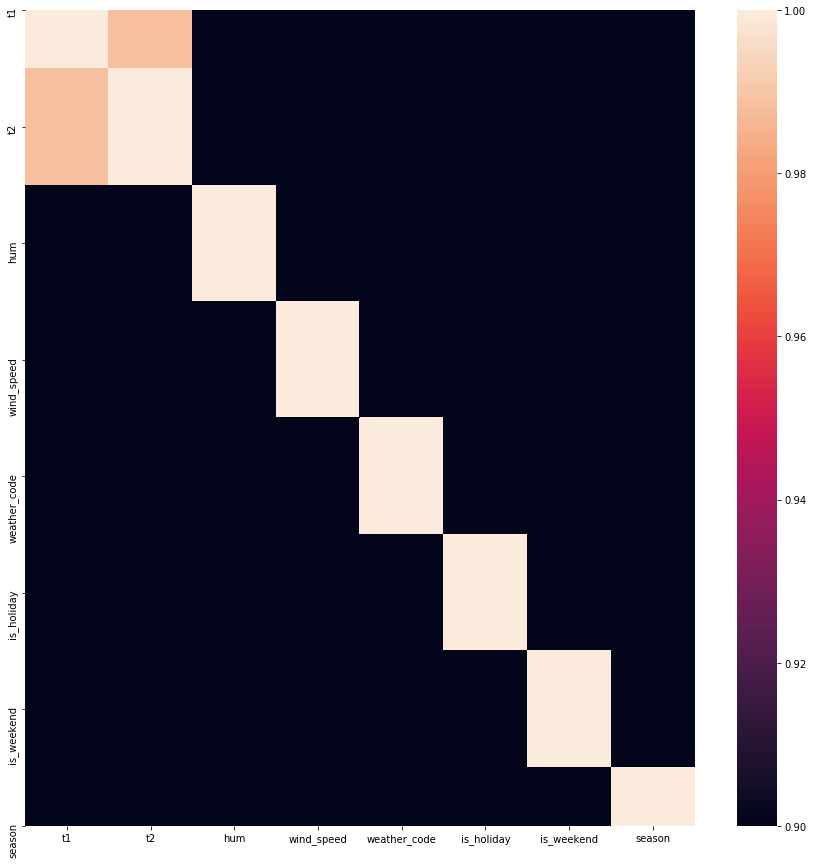

In [155]:
plt.figure(figsize=(15,15))
sns.heatmap(df[numerical].corr(), vmin=.9)

In [156]:
X.drop('t2', axis=1, inplace=True)

<span style="color:#011f4b; font-size:15px; ">
 <h3>TASK 3 [35 min]</h3> <br/>Test at least two hypothesis on your data
    <br/> <span style="color:#00a0e5">(Составьте и проверьте 2 гипотезы на данных - напишите выводы (анализ)) </span>
    </span>

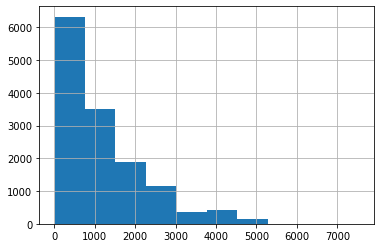

In [157]:
X['cnt'].hist()

In [158]:
def tperiod(x):
    if x in range(0, 7):
        return 1
    elif x in range(7, 13):
        return 2
    elif x in range(13, 19):
        return 3
    else:
        return 4 

In [159]:
X['hour'] = X['timestamp'].dt.hour
X['time_period'] = X['hour'].apply(tperiod)
X.drop('hour', axis=1, inplace=True)

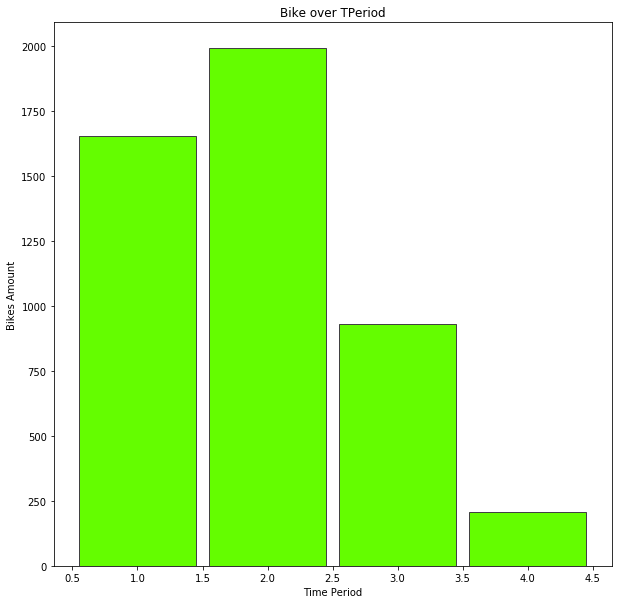

In [160]:
plt.figure(figsize=(10,10))
plt.bar(X['time_period'].unique(), X.groupby('time_period')['cnt'].mean(), width = 0.9, 
        color='#64fd00', ec='#414142')
plt.xlabel('Time Period')
plt.ylabel('Bikes Amount')
plt.title('Bike over TPeriod')
plt.show()

My hypothesis is that periods of day bicycles have effect on bike sharing<br>

Ho: B1 = B2<br>
H1: B1 != B2<br>

P val = 0.1
SE = SDT because we have a lot of n > 1000, but hist biased

In [161]:
B1 = X.groupby('time_period')['cnt'].mean()[2] 
B2 = X['cnt'].mean()
SE = X['cnt'].std()
1-(B1-B2)/SE

0.543405242069975

54% > 10% So I cannot reject H0 

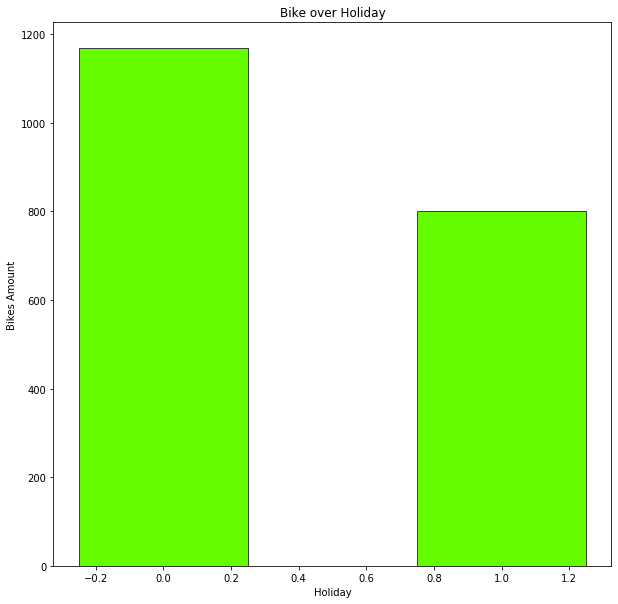

In [162]:
plt.figure(figsize=(10,10))
plt.bar(X['is_holiday'].unique(), X.groupby('is_holiday')['cnt'].mean(), width = 0.5, 
        color='#64fd00', ec='#414142')
plt.xlabel('Holiday')
plt.ylabel('Bikes Amount')
plt.title('Bike over Holiday')
plt.show()

My hypothesis is that on holidays bicycles are rented more often than on ordinary<br>

Ho: B1 = B2<br>
H1: B1 != B2<br>

P val = 0.1
SE = SDT because we have a lot of n > 1000, but hist biased

In [163]:
X['is_holiday'].value_counts()

0.0    13516
1.0      318
Name: is_holiday, dtype: int64

In [164]:
B1 = X.groupby('is_holiday')['cnt'].mean()[0] 
B2 = X['cnt'].mean()
SE = X['cnt'].std()
N = X['cnt'].shape[0]**.5
1-N*(B1-B2)/SE

0.08426768200787327

8% < 10% So I can claim that H0 is rejected 

<span style="color:#011f4b; font-size:15px; ">
 <h3>TASK 4 [40 min]</h3> <br/>Fit a linear regression model with your data, apply a regulization or feature selection methods. As a metric use RMSE and use cross-val-score as sampler. 
    <br/> <span style="color:#00a0e5">(Обучите на ваших данных модель линейной регресии - примените к модели регилиризацию или метод(ы) отбора параметров. Метрикой качества используйте RMSE) </span>
    </span>

In [165]:
y = X['cnt']
X = X.drop(['cnt', 'timestamp'], axis=1)
X.shape

(13834, 8)

In [166]:
X

,t1,hum,wind_speed,weather_code,is_holiday,is_weekend,season,time_period
2631,8.0,82.0,10.0,1.0,0.0,0.0,0.0,4
2632,8.0,84.5,6.5,1.0,0.0,0.0,0.0,1
2633,8.0,87.0,5.5,1.0,0.0,0.0,0.0,1
2635,8.0,87.0,6.0,1.0,0.0,0.0,0.0,1
2636,8.0,87.0,6.0,1.0,0.0,0.0,0.0,1
...,...,...,...,...,...,...,...,...
17409,5.0,81.0,19.0,3.0,0.0,0.0,3.0,4
17410,5.0,81.0,21.0,4.0,0.0,0.0,3.0,4
17411,5.5,78.5,24.0,4.0,0.0,0.0,3.0,4
17412,5.5,76.0,23.0,4.0,0.0,0.0,3.0,4


In [167]:
dummy = OneHotEncoder()
X_dum = X[['weather_code', 'season', 'time_period']]
X_scale = X[['t1', 'hum', 'wind_speed']]
X_bin = X[['is_holiday', 'is_weekend']]

In [168]:
X_dum = dummy.fit_transform(X_dum)

In [169]:
scal = StandardScaler()
X_scale = scal.fit_transform(X_scale)

In [170]:
X_scale.shape, X_bin.shape, X_dum.shape

((13834, 3), (13834, 2), (13834, 13))

In [171]:
X = np.hstack((X_bin, X_scale))

In [172]:
X = np.hstack((X, X_dum.toarray()))

In [174]:
model = LinearRegression(n_jobs=-1)
cv = KFold(shuffle=True, random_state=1)
cross_val_score(model, X, y, cv=cv, n_jobs=-1, scoring='r2').mean()

0.5202225489729215

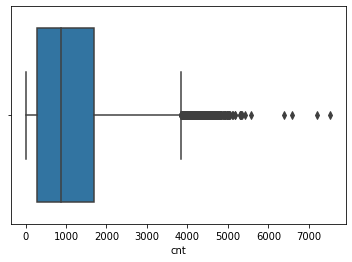

In [108]:
sns.boxplot(y)

In [99]:
X_train, X_test, y_train, y_test = train_test_split(X, y, 
                                                    random_state=241, test_size=0.3)

In [ ]:
ls = LassoCV(n_jobs=-1)
grid = GridSearchCV(ls, cv=cv, param_grid={'eps':np.linspace(0.0001, 0.001, 10)})
grid.fit(X_train, y_train)

In [413]:
mean_squared_error(y_test, grid.best_estimator_.predict(X_test))**0.5

938.9228352649934